In [3]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import sys
import importlib
from astropy.cosmology import FlatLambdaCDM

from utils_orbs.orb_paths import SetupPaths
import utils_orbs.readsubfHDF5Py3 as readSub
# from utils.read_group_cats import ReadCats
from utils_orbs.merger_trees import TraceMergerTree
from utils_orbs.readMergerHistoryFiles import FindHistory
from utils_orbs.vectorCorrection import vectorCorrection as vector

paths = SetupPaths()

In [4]:
plt.show();
plt.rcParams.update({'font.size':16,"xtick.direction":"in","ytick.direction":"in", 
                     "xtick.top":True, "ytick.right":True,"text.usetex":False,
                     "xtick.labelsize":18,"ytick.labelsize":18})

## Read data

In [7]:
orbit = {}
for i in [33,40,50]:
    orbit[i] = {}
    f = h5py.File(f"{paths.path_data}orbitdata_{i}.hdf5",'r')
    for key, val in f.items():
        orbit[i][key] = np.array(val)
    f.close()

f = h5py.File(f"{paths.path_data}snapshot_data.hdf5",'r')
convert = {}
for key, val in f.items():
    convert[key] = np.array(val)
f.close()

# Histogram of time spent at a separation

If I make an array of Elapsed Time that corresponds to each element of the separations array, then I make the separations for non zero and nan values, then I can mask the corresponding elapsed time array and then just histogram that, instead of having to loop through each pair. 

In [57]:
seps = orbit[40]['Separations']
times = convert['Lookback Time'][::-1][:-1]
elapsed = np.concatenate(([0],np.diff(times)))

sepmask = (lsep < seps) & (seps < usep)
sepmask[100]

elapsed_in_bin = np.where(sepmask,elapsed,0)
total_per_halo = np.sum(elapsed_in_bin,axis=1)
average_non_zero = np.average(total_per_halo[np.nonzero(total_per_halo)])
median_non_zero = np.median(total_per_halo[np.nonzero(total_per_halo)])



In [59]:
average_non_zero

2.431076176458779

In [51]:
np.nonzero(total_per_halo

SyntaxError: unexpected EOF while parsing (4292928900.py, line 1)

In [10]:
lsep = 10
usep = 100 

In [65]:
mergers

array([ True, False,  True, ...,  True,  True,  True])

In [74]:
len(bin_phys)

76

In [76]:
median_non_zero

0.22452070610640096

In [81]:
seps

array([[1335.45710573, 1301.73570049, 1263.07031678, ...,  561.13270907,
         523.96283224,           nan],
       [  72.4785963 ,   94.16676505,  121.07614832, ...,  180.61905335,
                  nan,           nan],
       [   0.        ,    0.        ,    0.        , ...,           nan,
                  nan,           nan],
       ...,
       [   0.        ,    0.        ,    0.        , ...,   63.33296498,
                  nan,           nan],
       [   0.        ,    0.        ,    0.        , ...,           nan,
                  nan,           nan],
       [   0.        ,    0.        ,    0.        , ...,           nan,
                  nan,           nan]])

In [83]:
sep_ckpcperh/little_h

array([[1335.45710573, 1314.13039431, 1293.35170563, ..., 6719.92516453,
        6801.14933171,           nan],
       [  72.4785963 ,   95.06338962,  123.97887977, ..., 2163.0293551 ,
                  nan,           nan],
       [   0.        ,    0.        ,    0.        , ...,           nan,
                  nan,           nan],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  758.45299736,
                  nan,           nan],
       [   0.        ,    0.        ,    0.        , ...,           nan,
                  nan,           nan],
       [   0.        ,    0.        ,    0.        , ...,           nan,
                  nan,           nan]])

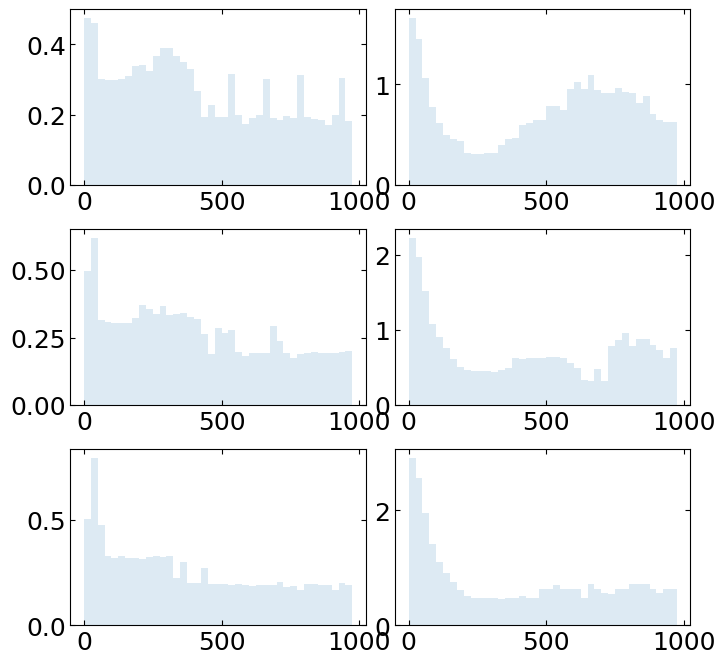

In [90]:
fig, ax = plt.subplots(3, 2, figsize=(8,8), sharex=False, 
                       gridspec_kw={'width_ratios': [1,1], 
                                    'height_ratios':[1,1,1],
                                    'wspace': 0.10,
                                    "hspace":0.25})

bin_phys = np.arange(0,1000,25)
bin_comov = np.arange(0,1000,25)
# medians, lowers, uppers = [], [], []
means = []


little_h  = 0.6774

times = convert['Lookback Time'][::-1][:-1]
elapsed = np.concatenate(([0],np.diff(times)))
scales = snap_dict['Scale'][::-1][:-1] # gives scale in same order as orbit data

for znum, snap in enumerate([33,40,50]):
    
    seps = orbit[snap]['Separations']
    scale_matrix = np.tile(scales,(len(seps),1))
    mergers = orbit[snap]['MergerFlag']==1
    sep_ckpcperh = seps/scale_matrix*little_h
    
    group_mask = orbit[snap]['GroupFlag']
    
    meds_phys = []
    meds_comov = []
    
    lower_sepcut = sep_ckpcperh > 10

    for binnum in range(len(bin_phys)-1):
        lsep = bin_phys[binnum]
        usep = bin_phys[binnum+1]

        # all 
        sepmask = (lsep < seps) & (seps < usep) & lower_sepcut & group_mask

        elapsed_in_bin = np.where(sepmask,elapsed,0)
        total_per_halo = np.sum(elapsed_in_bin,axis=1)
#         average_non_zero = np.average(total_per_halo[np.nonzero(total_per_halo)])
        median_non_zero = np.median(total_per_halo[np.nonzero(total_per_halo)])

#         means.append(average_non_zero)
        meds_phys.append(median_non_zero)
        
    ax[znum][0].stairs(meds_phys, edges=bin_phys, lw=2, fill=True, alpha=0.15)

        
    for binnum in range(len(bin_comov)-1):
        lsep = bin_comov[binnum]
        usep = bin_comov[binnum+1]

        # all 
        sepmask = (lsep < sep_ckpcperh) & (seps < sep_ckpcperh) & lower_sepcut & group_mask

        elapsed_in_bin = np.where(sepmask,elapsed,0)
        total_per_halo = np.sum(elapsed_in_bin,axis=1)
#         average_non_zero = np.average(total_per_halo[np.nonzero(total_per_halo)])
        median_non_zero = np.median(total_per_halo[np.nonzero(total_per_halo)])

#         means.append(average_non_zero)
        meds_comov.append(median_non_zero)

    ax[znum][1].stairs(meds_comov, edges=bin_comov, lw=2, fill=True, alpha=0.15)

#     lowers.append(np.quantile(nonzero_times,np.array([0.25]))[0])
#     uppers.append(np.quantile(nonzero_times,np.array([0.75]))[0])

#     ax[znum][1].stairs()
# ax.stairs(lowers, edges=bin_comov, lw=2, fill=True, alpha=0.15)
# ax.stairs(uppers, edges=bin_comov, lw=2, fill=True, alpha=0.15)

# colors = ["xkcd:light pink","xkcd:lavender","xkcd:purple"]
# colors = ["xkcd:lavender","xkcd:purple"]
# label = ["All pairs","Mergers"]
# j=0

# for mask in [nonmerge_mask,full_mask]:
    
#         # calculate number of mergers and elapsed time - used for weights 
#     elapsed = elapsed_matrix[mask]
#     num_mergers = np.count_nonzero(merger_array)
#     num_nonmergers = len(nonmerge_mask)-1

#    # create histograms
#     vals_kpc, edges_kpc = np.histogram(sep_matrix_kpc[mask],bins=bins_kpc,weights=elapsed/num_mergers)
#     vals_ckpc, edges_ckpc = np.histogram(sep_matrix_ckpcperh[mask],bins=bins_ckpc,weights=elapsed/num_mergers)

#     ###                      ###
#     # physical separation plot #
#     ###                      ###
#     ax[0].stairs(vals_kpc,edges_kpc,color=colors[j],lw=2,fill=True,alpha=0.15)
#     ax[0].stairs(vals_kpc,edges_kpc,color=colors[j],lw=2,label=label[j])

#     ###                      ###
#     # comoving separation plot #
#     ###                      ###
#     ax[1].stairs(vals_ckpc,edges_ckpc,lw=2,color=colors[j],fill=True,alpha=0.15)
#     ax[1].stairs(vals_ckpc,edges_ckpc,color=colors[j],lw=2,label=label[j])
#     j+=1

# for i,label in enumerate(["Physical","Comoving"]):
#     x0,x1 = ax[i].get_xlim()
#     y0,y1 = ax[i].get_ylim()
#     locx = 0.5*(x1-x0) + x0
#     locy = 0.80*(y1-y0) + y0
#     ax[i].text(locx,locy,label,ha="center")
    
# ax[1].legend()
# ax[0].set_xlabel("Physical Separation S [kpc]")
# ax[1].set_xlabel("Comoving Separation S [ckpc/h]")
# fig.supylabel("Average time in bin [Gyr]",x=0.01)
plt.show()

In [11]:
# array of the elapsed time with a nan value in the place of z=0
sep_matrix = check_dict["Separations"]

elapsed_noz0 = np.concatenate((np.array([np.nan]),elapsed_time))
elapsed_matrix = np.tile(elapsed_noz0,(len(sep_matrix),1))

print(np.shape(sep_matrix))
print(np.shape(elapsed_matrix))

(1330, 99)
(1330, 99)


In [12]:
nan_elapsed = np.isnan(elapsed_matrix)
nan_sep = np.isnan(sep_matrix)
zero_sep = sep_matrix == 0

matrix_mask = ~nan_elapsed&~nan_sep&~zero_sep

elapsed_masked = elapsed_matrix[matrix_mask]
sep_masked = sep_matrix[matrix_mask]


In [13]:
print(np.shape(sep_masked))
print(np.shape(elapsed_masked))

(67049,)
(67049,)


[ 6036  6957  9216 11071  9655  7083  4867  3045  1913  1302   966   737
   584]
[ 938.56327725  982.23887025 1057.35501329 1187.14017828 1059.56111684
  808.38883162  573.84060668  371.61587201  239.00654212  167.78786795
  126.31380997   98.36409875   79.14913233]


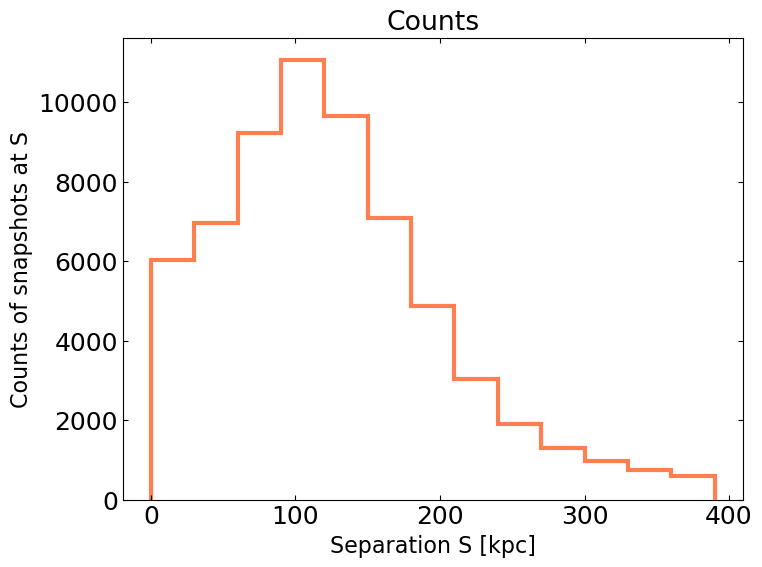

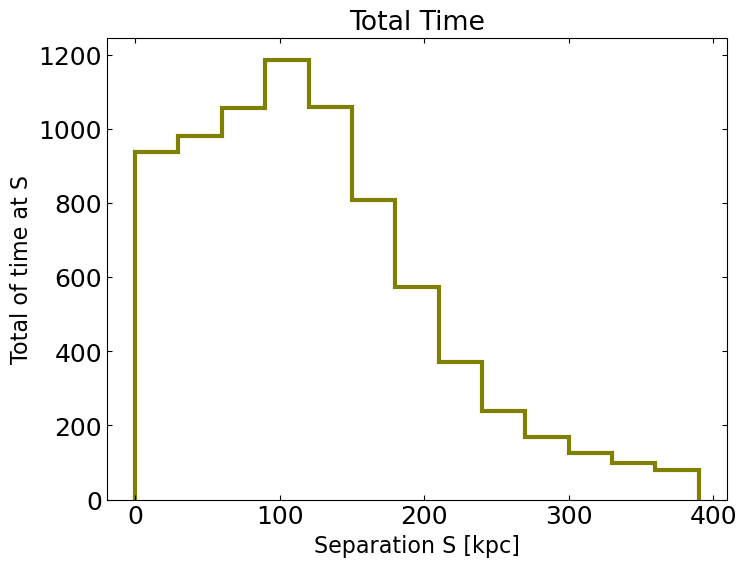

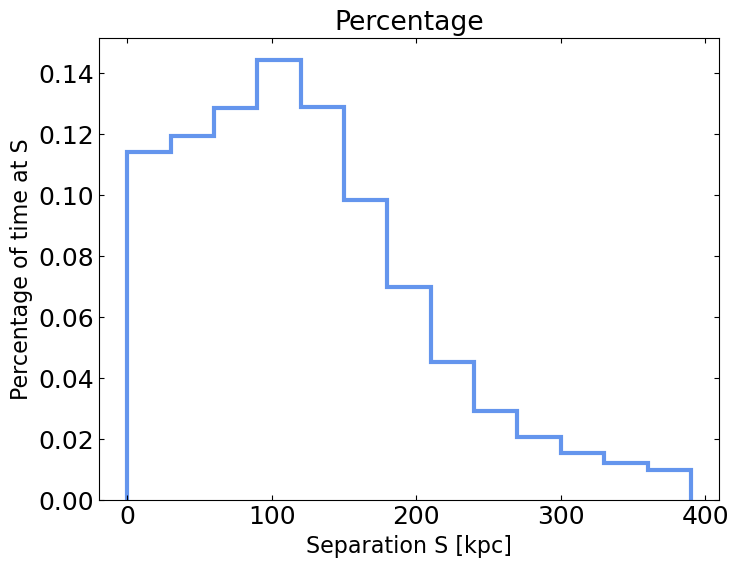

In [14]:
## first example of merged pair
xx = sep_masked
yy = elapsed_masked
bins = np.arange(0,400,30)

unscaled_vals, unscaled_edges = np.histogram(xx,bins=bins)
scaled_vals, scaled_edges = np.histogram(xx,bins=bins,weights=yy)
weighted_vals, weighted_edges = np.histogram(xx,bins=bins,weights=yy/np.sum(yy))

fig = plt.figure(figsize=(8,6))
plt.title("Counts")
plt.stairs(unscaled_vals,unscaled_edges,color="coral",lw=3)
plt.xlabel("Separation S [kpc]")
plt.ylabel("Counts of snapshots at S")


fig = plt.figure(figsize=(8,6))
plt.stairs(scaled_vals,unscaled_edges,color="olive",lw=3)
plt.title("Total Time")
plt.xlabel("Separation S [kpc]")
plt.ylabel("Total of time at S")


fig = plt.figure(figsize=(8,6))
plt.stairs(weighted_vals,unscaled_edges,color="cornflowerblue",lw=3)
plt.title("Percentage")
plt.xlabel("Separation S [kpc]")
plt.ylabel("Percentage of time at S")


print(unscaled_vals)
print(scaled_vals)

## Merger vs. Non-merger hists

In [15]:
# array of the elapsed time with a nan value in the place of z=0
elapsed_noz0 = np.concatenate((np.array([np.nan]),elapsed_time))
elapsed_matrix = np.tile(elapsed_noz0,(len(sep_matrix),1))

sep_matrix = check_dict["Separations"]

nan_elapsed = np.isnan(elapsed_matrix)
nan_sep = np.isnan(sep_matrix)
zero_sep = sep_matrix == 0

matrix_mask = ~nan_elapsed&~nan_sep&~zero_sep
merge_mask = np.tile(np.array(check_dict["MergerFlag"],dtype='bool'),(99,1)).transpose()

elapsed_masked = elapsed_matrix[matrix_mask]
sep_masked = sep_matrix[matrix_mask]


In [21]:
check_dict.keys()

dict_keys(['GroupFlag', 'MergerFlag', 'MergerSnapshot', 'Separations', 'StellarMass1', 'StellarMass2', 'StellarMassRatio', 'SubfindID1', 'SubfindID2', 'Velocities'])

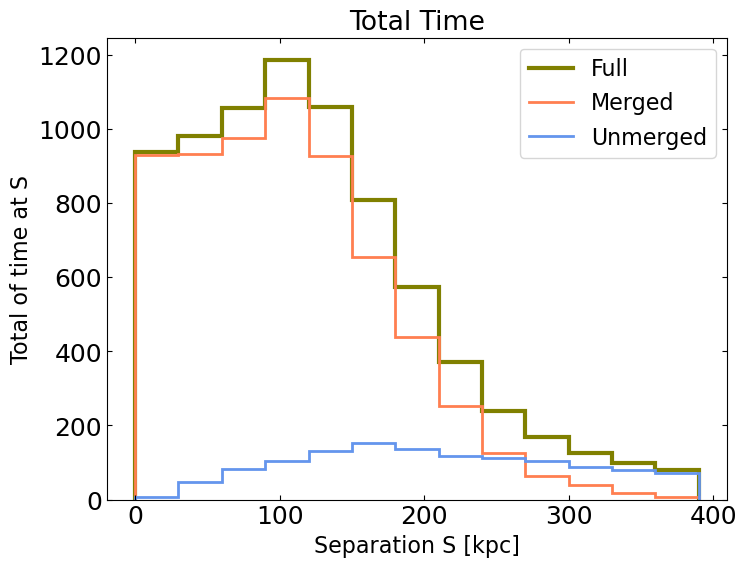

Note!! this is not scaled so times are non-physical


In [25]:
## merged vs. unmerged: TOTAL time spent at a separation 
xx = sep_masked
xx_merge = sep_matrix[matrix_mask&merge_mask]
xx_unmerge = sep_matrix[matrix_mask&~merge_mask]
yy = elapsed_masked
yy_merge = elapsed_matrix[matrix_mask&merge_mask]
yy_unmerge = elapsed_matrix[matrix_mask&~merge_mask]
bins = np.arange(0,400,30)

scaled_vals, scaled_edges = np.histogram(xx,bins=bins,weights=yy)
merged_vals, scaled_edges = np.histogram(xx_merge,bins=bins,weights=yy_merge)
unmerged_vals, scaled_edges = np.histogram(xx_unmerge,bins=bins,weights=yy_unmerge)


fig = plt.figure(figsize=(8,6))
plt.stairs(scaled_vals,unscaled_edges,color="olive",lw=3,label="Full")
plt.stairs(merged_vals,unscaled_edges,color="coral",lw=2,label="Merged")
plt.stairs(unmerged_vals,unscaled_edges,color="cornflowerblue",lw=2,label="Unmerged")
plt.legend()
plt.title("Total Time")
plt.xlabel("Separation S [kpc]")
plt.ylabel("Total of time at S")
plt.savefig(f"/xdisk/gbesla/katiechambe/orbs/plots/3_timescale-analysis/fullsamples.pdf")
plt.show()

print("Note!! this is not scaled so times are non-physical")

^ this plot looks a little funny... first, it's the cumulative time each population spends at certain separations (so if two dwarfs are at 100 kpc for 2Gyr, the total time is 4Gyr)


What if we want the distribution to be normalized to the number of pairs there are, so that it shows the average time that each individual pair spends at a separation -> don't want to just divide by the total population, but by the number of mergers and non mergers

### Timescale per pair for merged and unmerged populations

Text(0, 0.5, 'Total of time at S per pair (average)')

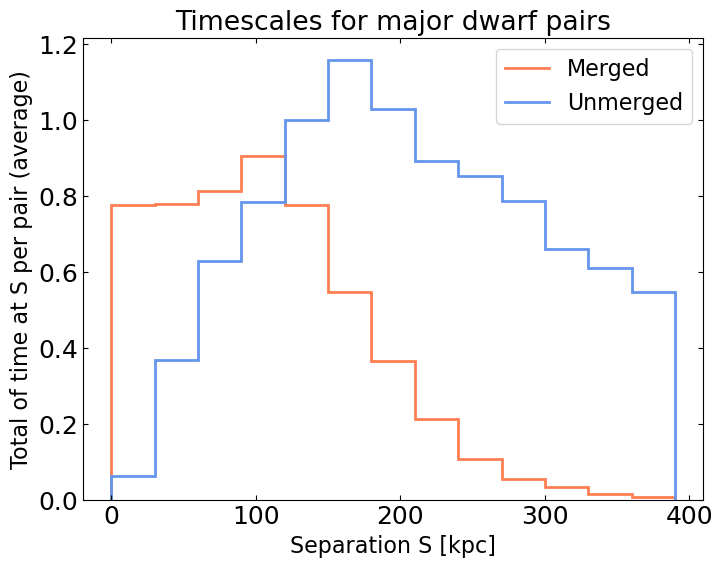

In [78]:
## merged vs. unmerged: TOTAL time spent at a separation 
xx = sep_masked
xx_merge = sep_matrix[matrix_mask&merge_mask]
xx_unmerge = sep_matrix[matrix_mask&~merge_mask]

yy = elapsed_masked
yy_merge = elapsed_matrix[matrix_mask&merge_mask]
yy_unmerge = elapsed_matrix[matrix_mask&~merge_mask]

num_pairs = np.shape(sep_matrix)[0]
num_mergers = np.sum(merge_mask,axis=0)[0]
num_unmerged = np.sum(~merge_mask,axis=0)[0]
bins = np.arange(0,400,30)

scaled_vals, scaled_edges = np.histogram(xx,bins=bins,weights=yy/num_pairs)
merged_vals, scaled_edges = np.histogram(xx_merge,bins=bins,weights=yy_merge/num_mergers)
unmerged_vals, scaled_edges = np.histogram(xx_unmerge,bins=bins,weights=yy_unmerge/num_unmerged)


fig = plt.figure(figsize=(8,6))
# plt.stairs(scaled_vals,unscaled_edges,color="olive",lw=3,label="Full")
plt.stairs(merged_vals,unscaled_edges,color="coral",lw=2,label="Merged")
plt.stairs(unmerged_vals,unscaled_edges,color="cornflowerblue",lw=2,label="Unmerged")
plt.legend()
plt.title("Timescales for major dwarf pairs")
plt.xlabel("Separation S [kpc]")
plt.ylabel("Total of time at S per pair (average)")


In [68]:
xx

array([27.74290672, 14.77115846, 33.91586875, ..., 78.87172492,
       75.28791969, 69.59072036])

In [69]:
yy

array([0.18856991, 0.1390652 , 0.18227452, ..., 0.03022084, 0.04223414,
       0.05697626])

# elapsed time vs. sep vs. z

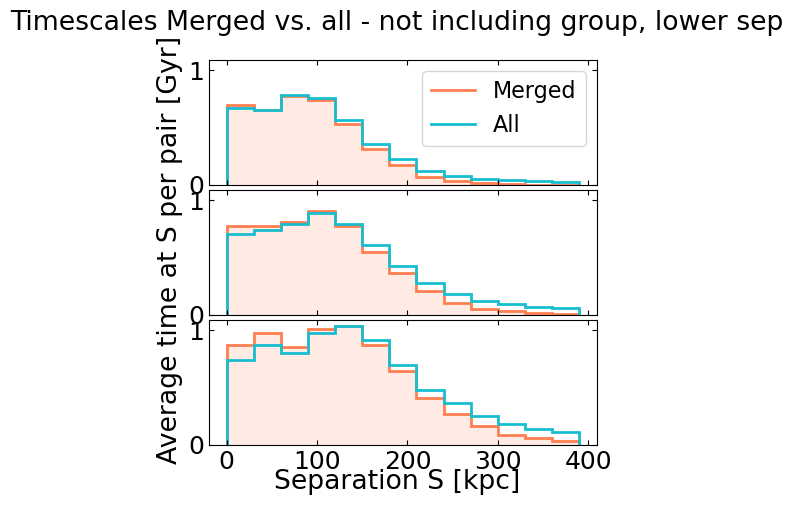

In [160]:
fig, ax = plt.subplots(3, 1, figsize=(5,5), sharey=True, sharex=True, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1,1,1],
                                    'wspace': 0.10,
                                    "hspace":0.04})
z={"33":"z=2","40":"z=1.5","50":"z=1"}


for ii, snap in enumerate([33, 40, 50]):
    orb = orbit[snap]
    sep_matrix = orb["Separations"]
    elapsed_time = np.diff(snap_dict["Lookback Time"][1:][::-1])
    
    # array of the elapsed time with a nan value in the place of z=0
    elapsed_noz0 = np.concatenate((np.array([np.nan]),elapsed_time))
    elapsed_matrix = np.tile(elapsed_noz0,(len(sep_matrix),1))

    nan_elapsed = np.isnan(elapsed_matrix)
    nan_sep = np.isnan(sep_matrix)
    zero_sep = sep_matrix == 0
    matrix_mask = ~nan_elapsed&~nan_sep&~zero_sep
    
    merger_array = np.array(orb["MergerFlag"],dtype='bool')
    merge_mask = np.tile(merger_array,(99,1)).transpose()

    elapsed_masked = elapsed_matrix[matrix_mask]
    sep_masked = sep_matrix[matrix_mask]

    ## calculate histograms
    xx_merge = sep_matrix[matrix_mask&merge_mask]
    xx_all = sep_matrix[matrix_mask]

    yy_merge = elapsed_matrix[matrix_mask&merge_mask]
    yy_all = elapsed_matrix[matrix_mask]

    num_mergers = sum(merger_array)
    num_pairs = len(merger_array)
    bins = np.arange(0,400,30)

    merged_vals, merged_edges = np.histogram(xx_merge,bins=bins,weights=yy_merge/num_mergers)
    all_vals, all_edges = np.histogram(xx_all,bins=bins,weights=yy_all/num_pairs)

    ax[ii].stairs(merged_vals,merged_edges,color="coral",lw=2,alpha=0.15,fill=True)
    ax[ii].stairs(merged_vals,merged_edges,color="coral",lw=2,label="Merged")
    ax[ii].stairs(all_vals,all_edges,color="tab:cyan",lw=2,label="All",)
#     ax[ii].stairs(unmerged_vals,unmerged_edges,color="cornflowerblue",lw=2,label="Unmerged")
    
#     ax[ii].text(0,1,f"{z[str(snap)]}")
#     ax[ii].text(230,1.05,f"{(100*num_unmerged/num_pairs):.1f}%",color="cornflowerblue")
#     ax[ii].text(100,0.2,f"{(100*num_mergers/num_pairs):.1f}%",color="coral")
    
    
ax[0].legend()
fig.suptitle("Timescales Merged vs. all - not including group, lower sep")
fig.supxlabel("Separation S [kpc]")
fig.supylabel("Average time at S per pair [Gyr]")
# plt.savefig(f"{paths.path_plots}/4_timescales/timevssep_z.pdf")
plt.show()


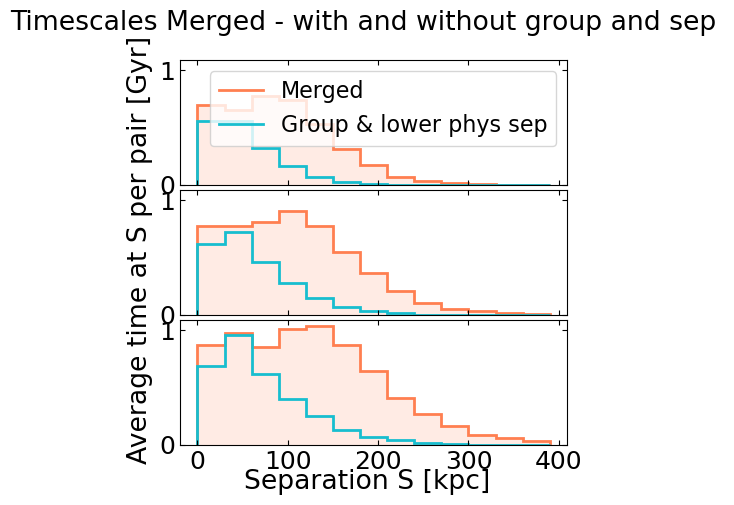

In [158]:
fig, ax = plt.subplots(3, 1, figsize=(5,5), sharey=True, sharex=True, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1,1,1],
                                    'wspace': 0.10,
                                    "hspace":0.04})
z={"33":"z=2","40":"z=1.5","50":"z=1"}


for ii, snap in enumerate([33, 40, 50]):
    orb = orbit[snap]
    sep_matrix = orb["Separations"]
    elapsed_time = np.diff(snap_dict["Lookback Time"][1:][::-1])
    
    # array of the elapsed time with a nan value in the place of z=0
    elapsed_noz0 = np.concatenate((np.array([np.nan]),elapsed_time))
    elapsed_matrix = np.tile(elapsed_noz0,(len(sep_matrix),1))

    nan_elapsed = np.isnan(elapsed_matrix)
    nan_sep = np.isnan(sep_matrix)
    zero_sep = sep_matrix == 0
    matrix_mask = ~nan_elapsed&~nan_sep&~zero_sep
    
    merger_array = np.array(orb["MergerFlag"],dtype='bool')
    merge_mask = np.tile(merger_array,(99,1)).transpose()

    elapsed_masked = elapsed_matrix[matrix_mask]
    sep_masked = sep_matrix[matrix_mask]

    ## calculate histograms
    xx_merge = sep_matrix[matrix_mask&merge_mask]
    xx_all = sep_matrix[matrix_mask&merge_mask&orb['GroupFlag']&(sep_matrix>10)]

    yy_merge = elapsed_matrix[matrix_mask&merge_mask]
    yy_all = elapsed_matrix[matrix_mask&merge_mask&orb['GroupFlag']&(sep_matrix>10)]

    num_mergers = sum(merger_array)
    num_pairs = len(merger_array) # this will change? 
    bins = np.arange(0,400,30)

    merged_vals, merged_edges = np.histogram(xx_merge,bins=bins,weights=yy_merge/num_mergers)
    all_vals, all_edges = np.histogram(xx_all,bins=bins,weights=yy_all/num_mergers)

    ax[ii].stairs(merged_vals,merged_edges,color="coral",lw=2,alpha=0.15,fill=True)
    ax[ii].stairs(merged_vals,merged_edges,color="coral",lw=2,label="Merged")
    ax[ii].stairs(all_vals,all_edges,color="tab:cyan",lw=2,label="Group & lower phys sep",)
#     ax[ii].stairs(unmerged_vals,unmerged_edges,color="cornflowerblue",lw=2,label="Unmerged")
    
#     ax[ii].text(0,1,f"{z[str(snap)]}")
#     ax[ii].text(230,1.05,f"{(100*num_unmerged/num_pairs):.1f}%",color="cornflowerblue")
#     ax[ii].text(100,0.2,f"{(100*num_mergers/num_pairs):.1f}%",color="coral")
    
    
ax[0].legend()
fig.suptitle("Timescales Merged - with and without group and sep ")
fig.supxlabel("Separation S [kpc]")
fig.supylabel("Average time at S per pair [Gyr]")
# plt.savefig(f"{paths.path_plots}/4_timescales/timevssep_z.pdf")
plt.show()


## Comoving vs. z

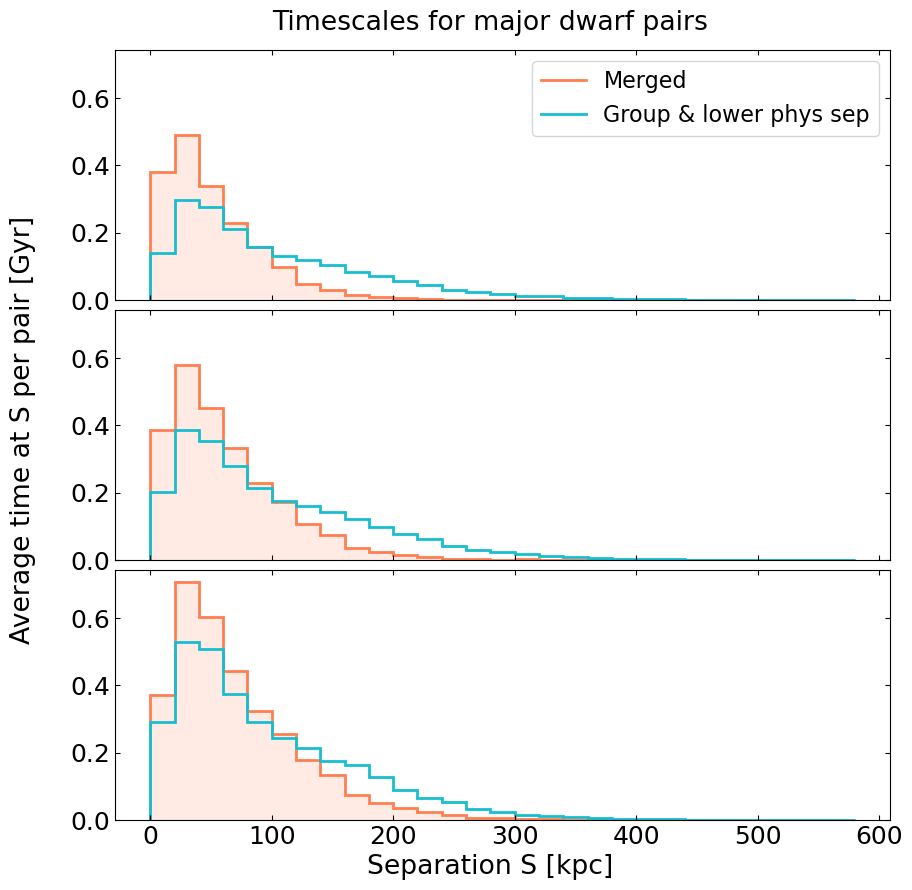

In [168]:
fig, ax = plt.subplots(3, 1, figsize=(10,10), sharey=True, sharex=True, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1,1,1],
                                    'wspace': 0.10,
                                    "hspace":0.04})
z={"33":"z=2","40":"z=1.5","50":"z=1"}


for ii, snap in enumerate([33, 40, 50]):
    orb = orbit[snap]
    sep_matrix = orb["Separations"]
    elapsed_time = np.diff(snap_dict["Lookback Time"][1:][::-1])
    scales = snap_dict['Scale'][::-1][:-1] # gives scale in same order as orbit data
    
    scale_matrix = np.tile(scales,(len(sep_matrix),1))
    sep_ckpcperh = sep_matrix/scale_matrix*little_h
    
    # array of the elapsed time with a nan value in the place of z=0
    elapsed_noz0 = np.concatenate((np.array([0]),elapsed_time))
    elapsed_matrix = np.tile(elapsed_noz0,(len(sep_matrix),1))

    nan_elapsed = np.isnan(elapsed_matrix)
    nan_sep = np.isnan(sep_matrix)
    zero_sep = sep_matrix == 0
    lower_sep = sep_ckpcperh > 10
    matrix_mask = ~nan_elapsed&~nan_sep&~zero_sep&lower_sep
    
    merger_array = np.array(orb["MergerFlag"],dtype='bool')
    merge_mask = np.tile(merger_array,(99,1)).transpose()

#     elapsed_masked = elapsed_matrix[matrix_mask]
#     sep_masked = sep_matrix[matrix_mask]

    ## calculate histograms
    xx_merge = sep_matrix[matrix_mask&merge_mask&orb['GroupFlag']]
    xx_all = sep_ckpcperh[matrix_mask&merge_mask&orb['GroupFlag']]

    yy_merge = elapsed_matrix[matrix_mask&merge_mask&orb['GroupFlag']]
    yy_all = elapsed_matrix[matrix_mask&merge_mask&orb['GroupFlag']]

    num_mergers = sum(merger_array)
    num_pairs = len(merger_array) # this will change? 
    bins_phys = np.arange(0,600,20)
    bins_ckpch = np.arange(0,600,20)

    merged_vals, merged_edges = np.histogram(xx_merge,bins=bins_phys,weights=yy_merge/num_mergers)
    all_vals, all_edges = np.histogram(xx_all,bins=bins_ckpch,weights=yy_all/num_mergers)

    ax[ii].stairs(merged_vals,merged_edges,color="coral",lw=2,alpha=0.15,fill=True)
    ax[ii].stairs(merged_vals,merged_edges,color="coral",lw=2,label="Merged")
    ax[ii].stairs(all_vals,all_edges,color="tab:cyan",lw=2,label="Group & lower phys sep",)
#     ax[ii].stairs(unmerged_vals,unmerged_edges,color="cornflowerblue",lw=2,label="Unmerged")
    
#     ax[ii].text(0,1,f"{z[str(snap)]}")
#     ax[ii].text(230,1.05,f"{(100*num_unmerged/num_pairs):.1f}%",color="cornflowerblue")
#     ax[ii].text(100,0.2,f"{(100*num_mergers/num_pairs):.1f}%",color="coral")
    
    
ax[0].legend()
fig.suptitle("Timescales for major dwarf pairs",y=0.92)
fig.supxlabel("Separation S [kpc]",y=0.05)
fig.supylabel("Average time at S per pair [Gyr]")
# plt.savefig(f"{paths.path_plots}/4_timescales/timevssep_z.pdf")
plt.show()


# 3 x 2 phys vs. comov

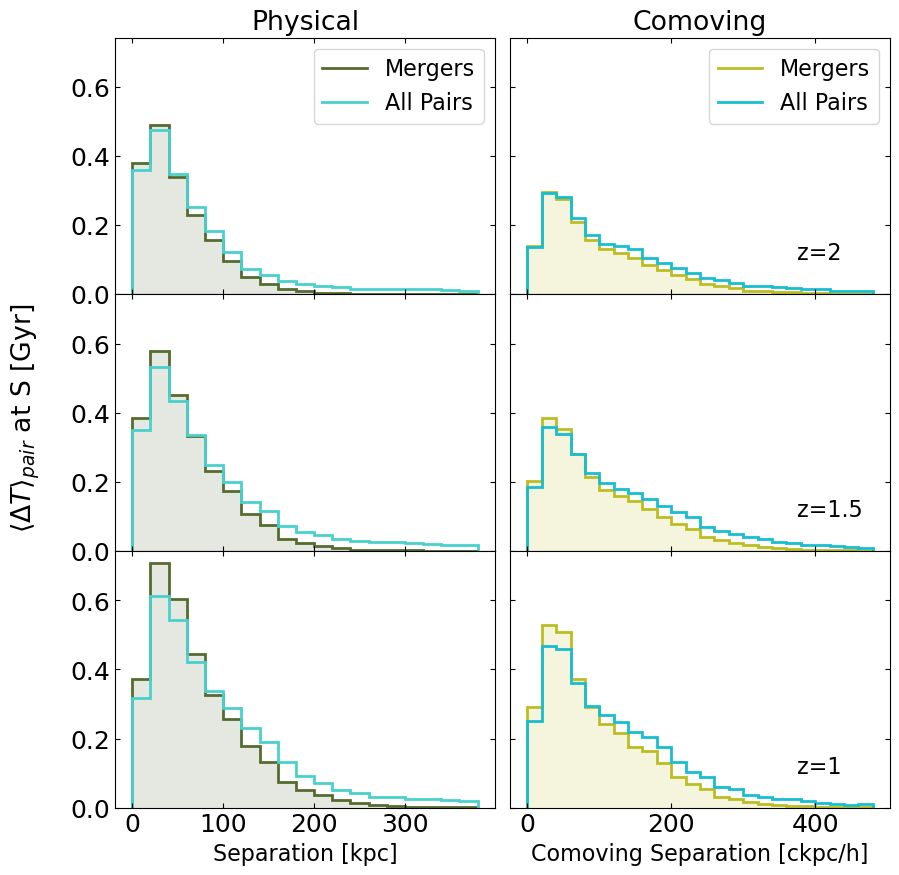

In [218]:
fig, ax = plt.subplots(3, 2, figsize=(10,10),sharey=True, sharex='col', 
                       gridspec_kw={'width_ratios': [1,1], 
                                    'height_ratios':[1,1,1],
                                    'wspace': 0.04,
                                    "hspace":0.0})
z={"33":"z=2","40":"z=1.5","50":"z=1"}


for ii, snap in enumerate([33, 40, 50]):
    orb = orbit[snap]
    sep_matrix = orb["Separations"]
    elapsed_time = np.diff(snap_dict["Lookback Time"][1:][::-1])
    scales = snap_dict['Scale'][::-1][:-1] # gives scale in same order as orbit data
    
    scale_matrix = np.tile(scales,(len(sep_matrix),1))
    sep_ckpcperh = sep_matrix/scale_matrix*little_h
    
    # array of the elapsed time with a nan value in the place of z=0
    elapsed_noz0 = np.concatenate((np.array([0]),elapsed_time))
    elapsed_matrix = np.tile(elapsed_noz0,(len(sep_matrix),1))

    nan_elapsed = np.isnan(elapsed_matrix)
    nan_sep = np.isnan(sep_matrix)
    zero_sep = sep_matrix == 0
    lower_sep = sep_ckpcperh > 10
    matrix_mask = ~nan_elapsed&~nan_sep&~zero_sep&lower_sep
    
    merger_array = np.array(orb["MergerFlag"],dtype='bool')
    merge_mask = np.tile(merger_array,(99,1)).transpose()

#     elapsed_masked = elapsed_matrix[matrix_mask]
#     sep_masked = sep_matrix[matrix_mask]

    ## calculate histograms
    xx_phys = sep_matrix[matrix_mask&merge_mask&orb['GroupFlag']]
    xx_phys_all = sep_matrix[matrix_mask&orb['GroupFlag']]
    

    xx_comov = sep_ckpcperh[matrix_mask&merge_mask&orb['GroupFlag']]
    xx_comov_all = sep_ckpcperh[matrix_mask&orb['GroupFlag']]

    yy = elapsed_matrix[matrix_mask&merge_mask&orb['GroupFlag']]
    yy_all = elapsed_matrix[matrix_mask&orb['GroupFlag']]

    num_mergers = sum(merger_array)
    num_pairs = len(merger_array) 
    bins_phys = np.arange(0,400,20)
    bins_ckpch = np.arange(0,500,20)

    phys, _ = np.histogram(xx_phys,bins=bins_phys,weights=yy/num_mergers)
    phys_all, _ = np.histogram(xx_phys_all,bins=bins_phys,weights=yy_all/num_pairs)
    comov, _ = np.histogram(xx_comov,bins=bins_ckpch,weights=yy/num_mergers)
    comov_all, _ = np.histogram(xx_comov_all,bins=bins_ckpch,weights=yy_all/num_pairs)    
    
    ax[ii][0].stairs(phys,bins_phys,color="darkolivegreen",lw=2,alpha=0.15,fill=True)
    ax[ii][0].stairs(phys,bins_phys,color="darkolivegreen",lw=2,label="Mergers")
    ax[ii][0].stairs(phys_all,bins_phys,color="mediumturquoise",lw=2,label='All Pairs')
    
    ax[ii][1].stairs(comov,bins_ckpch,color="tab:olive",lw=2,alpha=0.15,fill=True)
    ax[ii][1].stairs(comov,bins_ckpch,color="tab:olive",lw=2,label="Mergers")
    ax[ii][1].stairs(comov_all,bins_ckpch,color="tab:cyan",lw=2,label='All Pairs')
    
    ax[ii][1].text(375,0.1,f"{z[str(snap)]}")

    
#     ax[ii].stairs(merged_vals,merged_edges,color="coral",lw=2,alpha=0.15,fill=True)
#     ax[ii].stairs(merged_vals,merged_edges,color="coral",lw=2,label="Merged")
#     ax[ii].stairs(all_vals,all_edges,color="tab:cyan",lw=2,label="Group & lower phys sep",)
# #     ax[ii].stairs(unmerged_vals,unmerged_edges,color="cornflowerblue",lw=2,label="Unmerged")
    
#     ax[ii].text(0,1,f"{z[str(snap)]}")
#     ax[ii].text(230,1.05,f"{(100*num_unmerged/num_pairs):.1f}%",color="cornflowerblue")
#     ax[ii].text(100,0.2,f"{(100*num_mergers/num_pairs):.1f}%",color="coral")
    
    
ax[0][0].set_title("Physical")
ax[0][1].set_title("Comoving")

ax[2][0].set_xlabel("Separation [kpc]")
ax[2][1].set_xlabel("Comoving Separation [ckpc/h]")

ax[0][0].legend()
ax[0][1].legend()

ax[0][0].legend()

# fig.suptitle("Timescales for major dwarf pairs",y=0.92)
# fig.supxlabel("Separation S [kpc]",y=0.05)
fig.supylabel(r"$\left< \Delta T\right>_{pair}$ at S [Gyr]")
plt.savefig(f"{paths.path_plots}3_timescale-hists/timevssep_z.pdf")
plt.show()


In [ ]:
# array of the elapsed time with a nan value in the place of z=0
elapsed_noz0 = np.concatenate((np.array([np.nan]),elapsed_time))
elapsed_matrix = np.tile(elapsed_noz0,(len(sep_matrix),1))

sep_matrix = check_dict["Separations"]

nan_elapsed = np.isnan(elapsed_matrix)
nan_sep = np.isnan(sep_matrix)
zero_sep = sep_matrix == 0

matrix_mask = ~nan_elapsed&~nan_sep&~zero_sep
merge_mask = np.tile(np.array(check_dict["MergerFlag"],dtype='bool'),(99,1)).transpose()

elapsed_masked = elapsed_matrix[matrix_mask]
sep_masked = sep_matrix[matrix_mask]


In [4]:
## merged vs. unmerged: TOTAL time spent at a separation 
xx = sep_masked
xx_merge = sep_matrix[matrix_mask&merge_mask]
xx_unmerge = sep_matrix[matrix_mask&~merge_mask]

yy = elapsed_masked
yy_merge = elapsed_matrix[matrix_mask&merge_mask]
yy_unmerge = elapsed_matrix[matrix_mask&~merge_mask]

num_pairs = np.shape(sep_matrix)[0]
num_mergers = np.sum(merge_mask,axis=0)[0]
num_unmerged = np.sum(~merge_mask,axis=0)[0]
bins = np.arange(0,400,30)

scaled_vals, scaled_edges = np.histogram(xx,bins=bins,weights=yy/num_pairs)
merged_vals, scaled_edges = np.histogram(xx_merge,bins=bins,weights=yy_merge/num_mergers)
unmerged_vals, scaled_edges = np.histogram(xx_unmerge,bins=bins,weights=yy_unmerge/num_unmerged)


fig = plt.figure(figsize=(8,6))
# plt.stairs(scaled_vals,unscaled_edges,color="olive",lw=3,label="Full")
plt.stairs(merged_vals,unscaled_edges,color="coral",lw=2,label="Merged")
plt.stairs(unmerged_vals,unscaled_edges,color="cornflowerblue",lw=2,label="Unmerged")
plt.legend()
plt.title("Timescales for major dwarf pairs")
plt.xlabel("Separation S [kpc]")
plt.ylabel("Total of time at S per pair (average)")


NameError: name 'sep_masked' is not defined

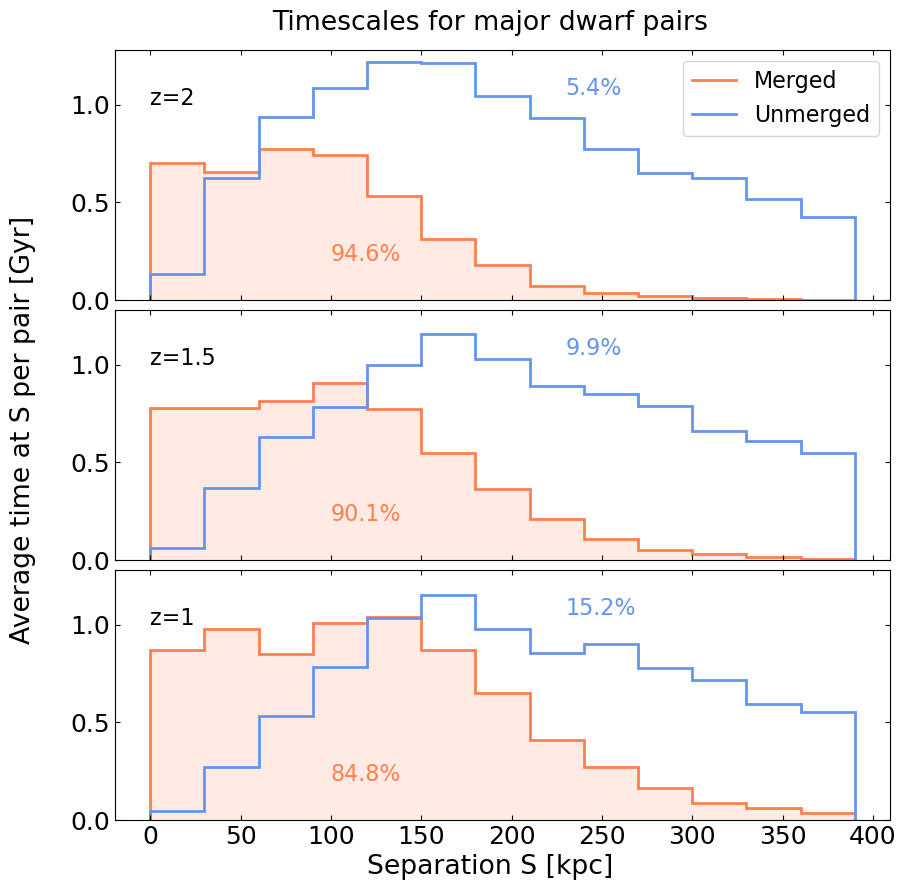

In [94]:
fig, ax = plt.subplots(3, 1, figsize=(10,10), sharey=True, sharex=True, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1,1,1],
                                    'wspace': 0.10,
                                    "hspace":0.04})
z={"33":"z=2","40":"z=1.5","50":"z=1"}


for ii, snap in enumerate([33, 40, 50]):
    orb = orbit[snap]
    sep_matrix = orb["Separations"]
    elapsed_time = np.diff(snap_dict["Lookback Time"][1:][::-1])
    
    # array of the elapsed time with a nan value in the place of z=0
    elapsed_noz0 = np.concatenate((np.array([np.nan]),elapsed_time))
    elapsed_matrix = np.tile(elapsed_noz0,(len(sep_matrix),1))

    nan_elapsed = np.isnan(elapsed_matrix)
    nan_sep = np.isnan(sep_matrix)
    zero_sep = sep_matrix == 0
    matrix_mask = ~nan_elapsed&~nan_sep&~zero_sep
    
    merger_array = np.array(orb["MergerFlag"],dtype='bool')
    merge_mask = np.tile(merger_array,(99,1)).transpose()

    elapsed_masked = elapsed_matrix[matrix_mask]
    sep_masked = sep_matrix[matrix_mask]

    ## calculate histograms
    xx_merge = sep_matrix[matrix_mask&merge_mask]
    xx_unmerge = sep_matrix[matrix_mask&~merge_mask]

    yy_merge = elapsed_matrix[matrix_mask&merge_mask]
    yy_unmerge = elapsed_matrix[matrix_mask&~merge_mask]

    num_mergers = np.sum(merge_mask,axis=0)[0]
    num_unmerged = np.sum(~merge_mask,axis=0)[0]
    num_pairs = num_mergers + num_unmerged
    bins = np.arange(0,400,30)

    merged_vals, merged_edges = np.histogram(xx_merge,bins=bins,weights=yy_merge/num_mergers)
    unmerged_vals, unmerged_edges = np.histogram(xx_unmerge,bins=bins,weights=yy_unmerge/num_unmerged)

    ax[ii].stairs(merged_vals,merged_edges,color="coral",lw=2,fill=True,alpha=0.15)
    ax[ii].stairs(merged_vals,merged_edges,color="coral",lw=2,label="Merged")
    ax[ii].stairs(unmerged_vals,unmerged_edges,color="cornflowerblue",lw=2,label="Unmerged")
    
    ax[ii].text(0,1,f"{z[str(snap)]}")
    ax[ii].text(230,1.05,f"{(100*num_unmerged/num_pairs):.1f}%",color="cornflowerblue")
    ax[ii].text(100,0.2,f"{(100*num_mergers/num_pairs):.1f}%",color="coral")
    
    
ax[0].legend()
fig.suptitle("Timescales for major dwarf pairs",y=0.92)
fig.supxlabel("Separation S [kpc]",y=0.05)
fig.supylabel("Average time at S per pair [Gyr]")
# plt.savefig(f"{paths.path_plots}/4_timescales/timevssep_z.pdf")
plt.show()


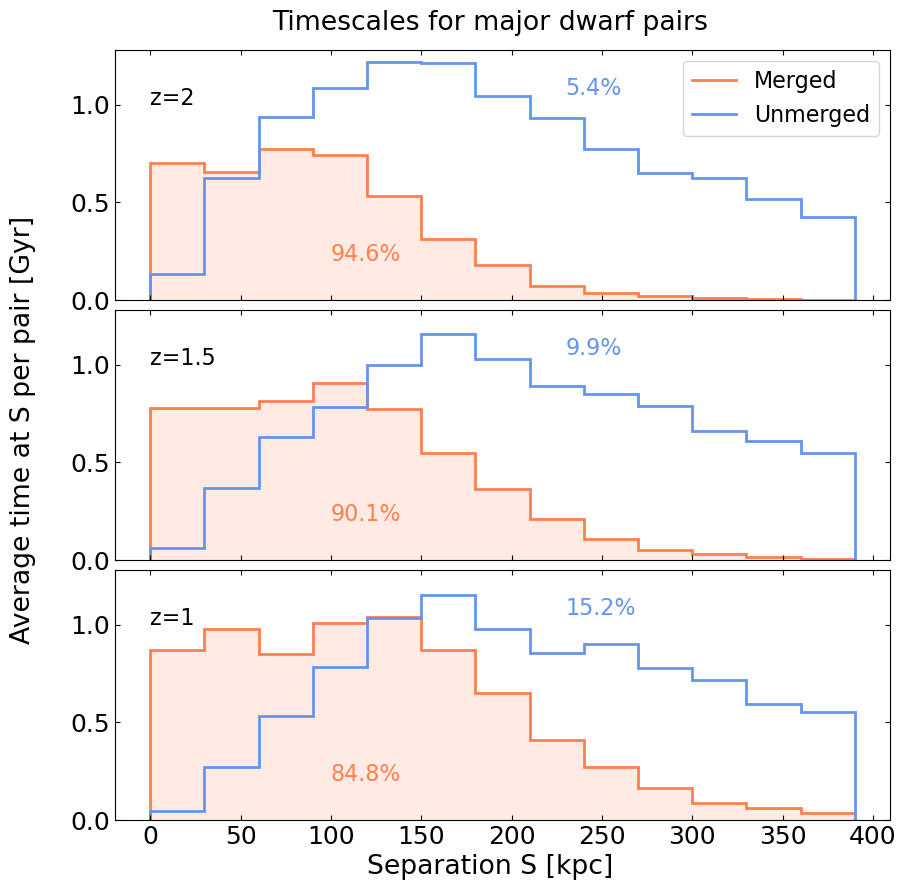

In [95]:
fig, ax = plt.subplots(3, 1, figsize=(10,10), sharey=True, sharex=True, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1,1,1],
                                    'wspace': 0.10,
                                    "hspace":0.04})
z={"33":"z=2","40":"z=1.5","50":"z=1"}


for ii, snap in enumerate([33, 40, 50]):
    orb = orbit[snap]
    sep_matrix = orb["Separations"]
    elapsed_time = np.diff(snap_dict["Lookback Time"][1:][::-1])
    
    # array of the elapsed time with a nan value in the place of z=0
    elapsed_noz0 = np.concatenate((np.array([np.nan]),elapsed_time))
    elapsed_matrix = np.tile(elapsed_noz0,(len(sep_matrix),1))

    nan_elapsed = np.isnan(elapsed_matrix)
    nan_sep = np.isnan(sep_matrix)
    zero_sep = sep_matrix == 0
    matrix_mask = ~nan_elapsed&~nan_sep&~zero_sep
    
    merger_array = np.array(orb["MergerFlag"],dtype='bool')
    merge_mask = np.tile(merger_array,(99,1)).transpose()

    elapsed_masked = elapsed_matrix[matrix_mask]
    sep_masked = sep_matrix[matrix_mask]

    ## calculate histograms
    xx_merge = sep_matrix[matrix_mask&merge_mask]
    xx_unmerge = sep_matrix[matrix_mask&~merge_mask]

    yy_merge = elapsed_matrix[matrix_mask&merge_mask]
    yy_unmerge = elapsed_matrix[matrix_mask&~merge_mask]

    num_mergers = np.sum(merge_mask,axis=0)[0]
    num_unmerged = np.sum(~merge_mask,axis=0)[0]
    num_pairs = num_mergers + num_unmerged
    bins = np.arange(0,400,30)

    merged_vals, merged_edges = np.histogram(xx_merge,bins=bins,weights=yy_merge/num_mergers)
    unmerged_vals, unmerged_edges = np.histogram(xx_unmerge,bins=bins,weights=yy_unmerge/num_unmerged)

    ax[ii].stairs(merged_vals,merged_edges,color="coral",lw=2,fill=True,alpha=0.15)
    ax[ii].stairs(merged_vals,merged_edges,color="coral",lw=2,label="Merged")
    ax[ii].stairs(unmerged_vals,unmerged_edges,color="cornflowerblue",lw=2,label="Unmerged")
    
    ax[ii].text(0,1,f"{z[str(snap)]}")
    ax[ii].text(230,1.05,f"{(100*num_unmerged/num_pairs):.1f}%",color="cornflowerblue")
    ax[ii].text(100,0.2,f"{(100*num_mergers/num_pairs):.1f}%",color="coral")
    
    
ax[0].legend()
fig.suptitle("Timescales for major dwarf pairs",y=0.92)
fig.supxlabel("Separation S [kpc]",y=0.05)
fig.supylabel("Average time at S per pair [Gyr]")
# plt.savefig(f"{paths.path_plots}/4_timescales/timevssep_z.pdf")
plt.show()


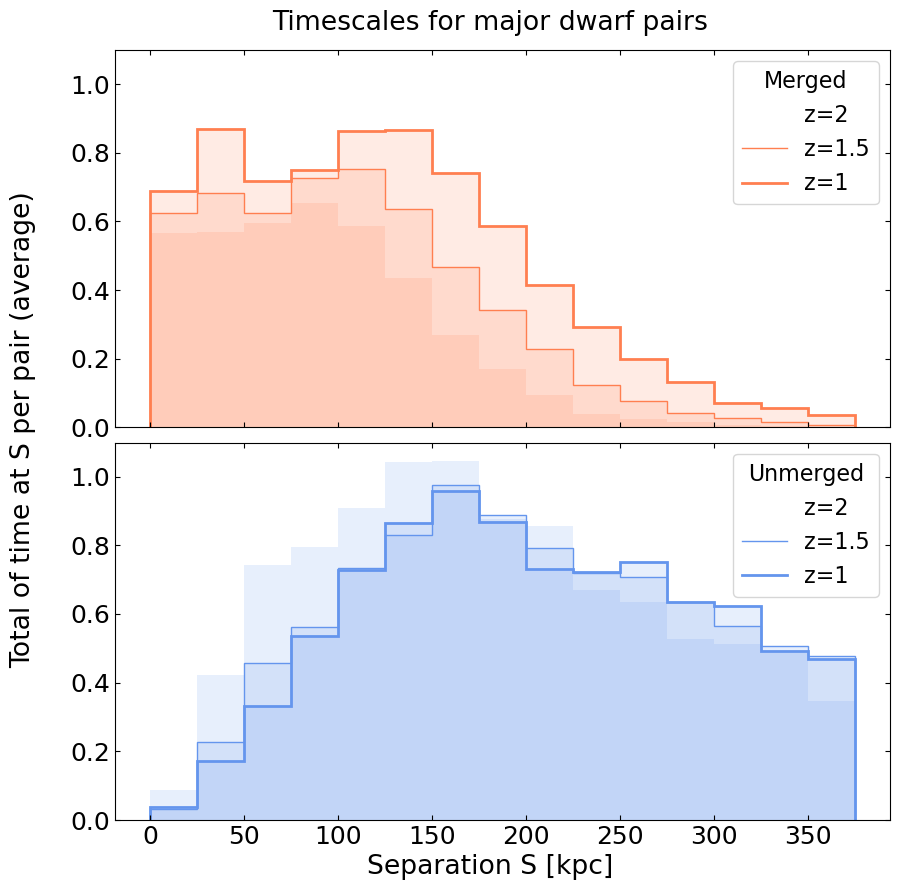

In [92]:
fig, ax = plt.subplots(2, 1, figsize=(10,10), sharey=True, sharex=True, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1,1],
                                    'wspace': 0.10,
                                    "hspace":0.04})
z={"33":"z=2","40":"z=1.5","50":"z=1"}


for ii, snap in enumerate([33, 40, 50]):
    orb = orbit[snap]
    sep_matrix = orb["Separations"]
    elapsed_time = np.diff(snap_dict["Lookback Time"][1:][::-1])
    
    # array of the elapsed time with a nan value in the place of z=0
    elapsed_noz0 = np.concatenate((np.array([0]),elapsed_time))
    elapsed_matrix = np.tile(elapsed_noz0,(len(sep_matrix),1))

    nan_elapsed = np.isnan(elapsed_matrix)
    nan_sep = np.isnan(sep_matrix)
    zero_sep = sep_matrix == 0
    matrix_mask = ~nan_elapsed&~nan_sep&~zero_sep
    
    merger_array = np.array(orb["MergerFlag"],dtype='bool')
    merge_mask = np.tile(merger_array,(99,1)).transpose()

    elapsed_masked = elapsed_matrix[matrix_mask]
    sep_masked = sep_matrix[matrix_mask]

    ## calculate histograms
    xx_merge = sep_matrix[matrix_mask&merge_mask]
    xx_unmerge = sep_matrix[matrix_mask&~merge_mask]

    yy_merge = elapsed_matrix[matrix_mask&merge_mask]
    yy_unmerge = elapsed_matrix[matrix_mask&~merge_mask]

    num_mergers = np.sum(merge_mask,axis=0)[0]
    num_unmerged = np.sum(~merge_mask,axis=0)[0]
    num_pairs = num_mergers + num_unmerged
    bins = np.arange(0,400,25)

    merged_vals, merged_edges = np.histogram(xx_merge,bins=bins,weights=yy_merge/num_mergers)
    unmerged_vals, unmerged_edges = np.histogram(xx_unmerge,bins=bins,weights=yy_unmerge/num_unmerged)

    ax[0].stairs(merged_vals,merged_edges,color="coral",lw=ii,fill=True,alpha=0.15)
    ax[0].stairs(merged_vals,merged_edges,color="coral",lw=ii,label=f"{z[str(snap)]}")
    ax[1].stairs(unmerged_vals,unmerged_edges,color="cornflowerblue",lw=ii,fill=True,alpha=0.15)
    ax[1].stairs(unmerged_vals,unmerged_edges,color="cornflowerblue",lw=ii,label=f"{z[str(snap)]}")
    
#     ax[ii].text(230,1.05,f"{(100*num_unmerged/num_pairs):.1f}%",color="cornflowerblue")
#     ax[ii].text(100,0.2,f"{(100*num_mergers/num_pairs):.1f}%",color="coral")
    
    
ax[0].legend(title="Merged")
ax[1].legend(title="Unmerged")
fig.suptitle("Timescales for major dwarf pairs",y=0.92)
fig.supxlabel("Separation S [kpc]",y=0.05)
fig.supylabel("Total of time at S per pair (average)")
plt.show()


# Testing manual average vs. histogram

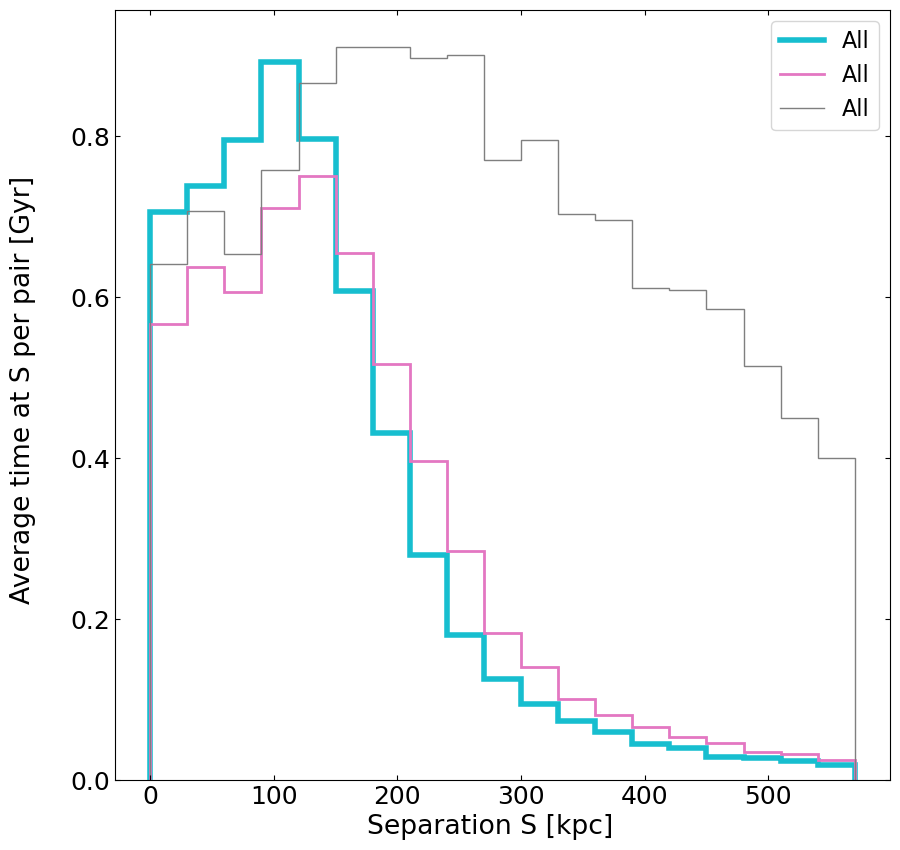

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(10,10), sharey=True, sharex=True, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1],
                                    'wspace': 0.10,
                                    "hspace":0.04})
z={"33":"z=2","40":"z=1.5","50":"z=1"}


orb = orbit[40]
sep_matrix = orb["Separations"]
seps = orbit[40]['Separations']
elapsed_time = np.diff(snap_dict["Lookback Time"][1:][::-1])

# array of the elapsed time with a nan value in the place of z=0
elapsed_noz0 = np.concatenate((np.array([np.nan]),elapsed_time))
elapsed_matrix = np.tile(elapsed_noz0,(len(sep_matrix),1))

nan_elapsed = np.isnan(elapsed_matrix)
nan_sep = np.isnan(sep_matrix)
zero_sep = sep_matrix == 0
matrix_mask = ~nan_elapsed&~nan_sep&~zero_sep

merger_array = np.array(orb["MergerFlag"],dtype='bool')
merge_mask = np.tile(merger_array,(99,1)).transpose()

elapsed_masked = elapsed_matrix[matrix_mask]
sep_masked = sep_matrix[matrix_mask]

## calculate histograms
xx_merge = sep_matrix[matrix_mask&merge_mask]
xx_all = sep_matrix[matrix_mask]

yy_merge = elapsed_matrix[matrix_mask&merge_mask]
yy_all = elapsed_matrix[matrix_mask]


num_mergers = sum(merger_array)
num_pairs = len(merger_array)
bins = np.arange(0,600,30)

#merged_vals, merged_edges = np.histogram(xx_merge,bins=bins,weights=yy_merge/num_mergers)
all_vals, all_edges = np.histogram(xx_all,bins=bins,weights=yy_all/num_pairs)

#ax.stairs(merged_vals,merged_edges,color="coral",lw=2,label="Merged")
ax.stairs(all_vals,all_edges,color="tab:cyan",lw=4,label="All")

aves = [] 
aves_nz = []

for binnum in range(len(bins)-1):
        lsep = bin_phys[binnum]
        usep = bin_phys[binnum+1]

        # all 
        sepmask = (lsep < seps) & (seps < usep) # does not include lower separation cut!! or group cut!! 

        elapsed_in_bin = np.where(sepmask,elapsed,0)
        total_per_halo = np.sum(elapsed_in_bin,axis=1)
#         average_non_zero = np.average(total_per_halo[np.nonzero(total_per_halo)])
        ave = np.average(total_per_halo)
        ave_nonzero = np.average(total_per_halo[np.nonzero(total_per_halo)])

#         means.append(average_non_zero)
        aves.append(ave)
        aves_nz.append(ave_nonzero)
        
#     ax[znum][0].stairs(meds_phys, edges=bin_phys, lw=2, fill=True, alpha=0.15)

ax.stairs(aves,edges=bins,color="tab:pink",lw=2,label="All")
ax.stairs(aves_nz,edges=bins,color="tab:grey",lw=1,label="All")

ax.legend()
# fig.suptitle("Timescales for major dwarf pairs",y=0.92)
fig.supxlabel("Separation S [kpc]",y=0.05)
fig.supylabel("Average time at S per pair [Gyr]")
# plt.savefig(f"{paths.path_plots}/4_timescales/timevssep_z.pdf")
plt.show()


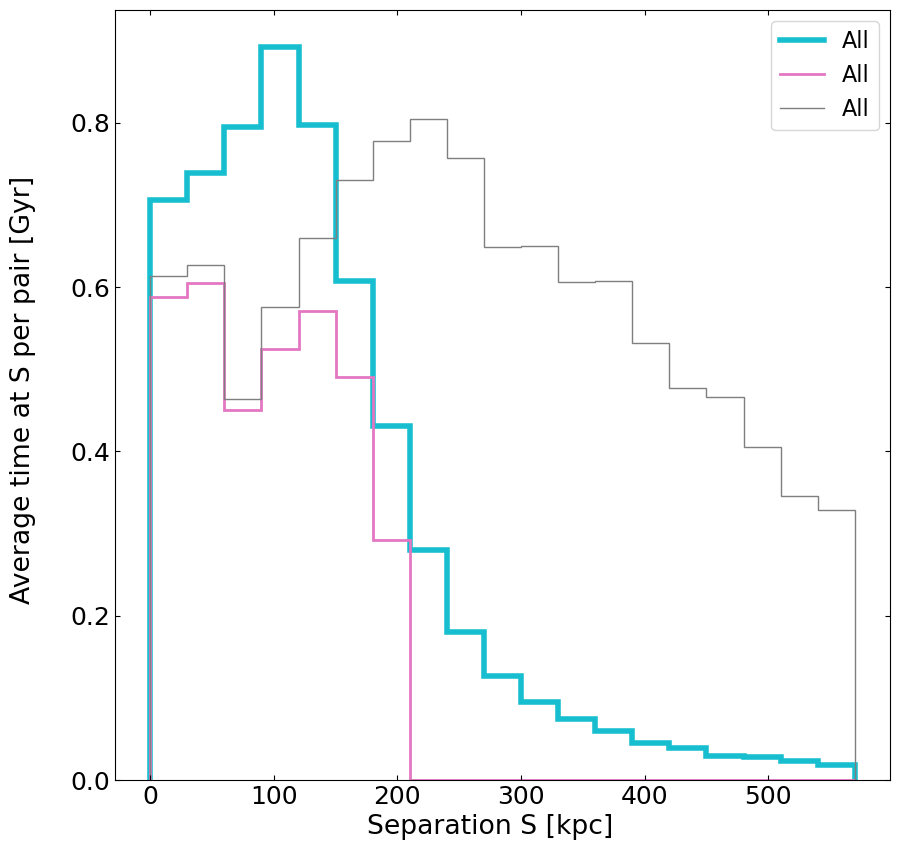

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(10,10), sharey=True, sharex=True, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1],
                                    'wspace': 0.10,
                                    "hspace":0.04})
z={"33":"z=2","40":"z=1.5","50":"z=1"}


orb = orbit[40]
sep_matrix = orb["Separations"]
seps = orbit[40]['Separations']
elapsed_time = np.diff(snap_dict["Lookback Time"][1:][::-1])

# array of the elapsed time with a nan value in the place of z=0
elapsed_noz0 = np.concatenate((np.array([np.nan]),elapsed_time))
elapsed_matrix = np.tile(elapsed_noz0,(len(sep_matrix),1))

nan_elapsed = np.isnan(elapsed_matrix)
nan_sep = np.isnan(sep_matrix)
zero_sep = sep_matrix == 0
matrix_mask = ~nan_elapsed&~nan_sep&~zero_sep

merger_array = np.array(orb["MergerFlag"],dtype='bool')
merge_mask = np.tile(merger_array,(99,1)).transpose()

elapsed_masked = elapsed_matrix[matrix_mask]
sep_masked = sep_matrix[matrix_mask]

## calculate histograms
xx_merge = sep_matrix[matrix_mask&merge_mask]
xx_all = sep_matrix[matrix_mask]

yy_merge = elapsed_matrix[matrix_mask&merge_mask]
yy_all = elapsed_matrix[matrix_mask]


num_mergers = sum(merger_array)
num_pairs = len(merger_array)
bins = np.arange(0,600,30)

#merged_vals, merged_edges = np.histogram(xx_merge,bins=bins,weights=yy_merge/num_mergers)
all_vals, all_edges = np.histogram(xx_all,bins=bins,weights=yy_all/num_pairs)

#ax.stairs(merged_vals,merged_edges,color="coral",lw=2,label="Merged")
ax.stairs(all_vals,all_edges,color="tab:cyan",lw=4,label="All")

meds = [] 
meds_nz = []

for binnum in range(len(bins)-1):
        lsep = bin_phys[binnum]
        usep = bin_phys[binnum+1]

        # all 
        sepmask = (lsep < seps) & (seps < usep) # does not include lower separation cut!! or group cut!! 

        elapsed_in_bin = np.where(sepmask,elapsed,0)
        total_per_halo = np.sum(elapsed_in_bin,axis=1)
#         average_non_zero = np.average(total_per_halo[np.nonzero(total_per_halo)])
        med = np.median(total_per_halo)
        med_nonzero = np.median(total_per_halo[np.nonzero(total_per_halo)])

#         means.append(average_non_zero)
        meds.append(med)
        meds_nz.append(med_nonzero)
        
#     ax[znum][0].stairs(meds_phys, edges=bin_phys, lw=2, fill=True, alpha=0.15)

ax.stairs(meds,edges=bins,color="tab:pink",lw=2,label="All")
ax.stairs(meds_nz,edges=bins,color="tab:grey",lw=1,label="All")

ax.legend()
# fig.suptitle("Timescales for major dwarf pairs",y=0.92)
fig.supxlabel("Separation S [kpc]",y=0.05)
fig.supylabel("Average time at S per pair [Gyr]")
# plt.savefig(f"{paths.path_plots}/4_timescales/timevssep_z.pdf")
plt.show()


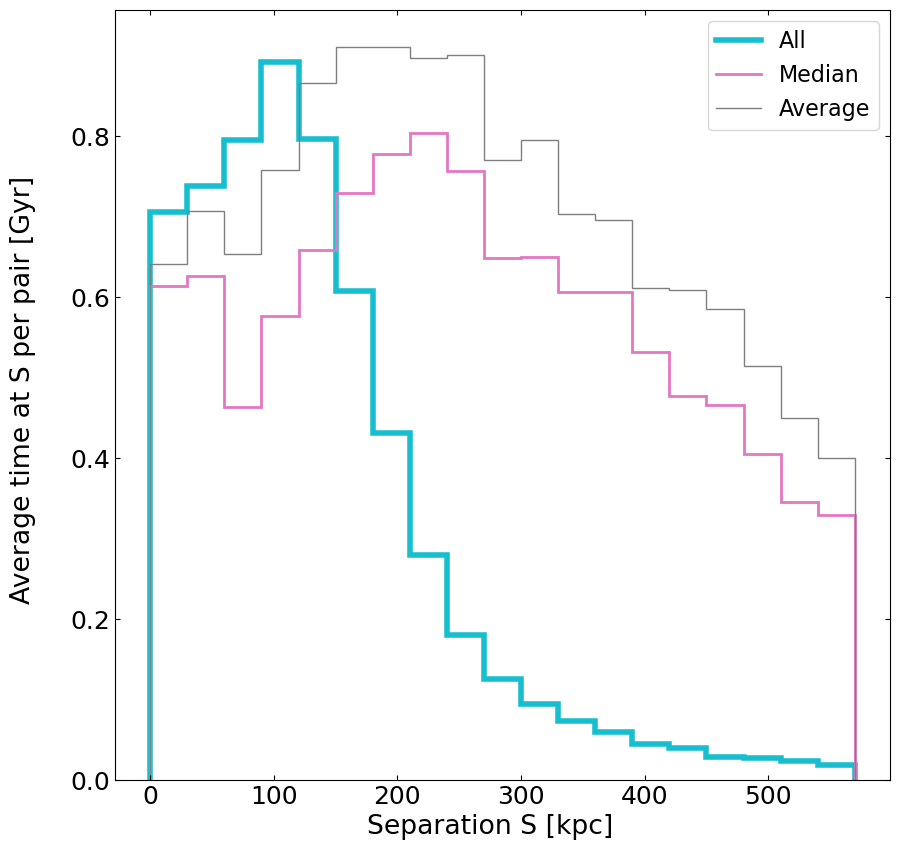

In [128]:
fig, ax = plt.subplots(1, 1, figsize=(10,10), sharey=True, sharex=True, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1],
                                    'wspace': 0.10,
                                    "hspace":0.04})
z={"33":"z=2","40":"z=1.5","50":"z=1"}


orb = orbit[40]
sep_matrix = orb["Separations"]
seps = orbit[40]['Separations']
elapsed_time = np.diff(snap_dict["Lookback Time"][1:][::-1])

# array of the elapsed time with a nan value in the place of z=0
elapsed_noz0 = np.concatenate((np.array([np.nan]),elapsed_time))
elapsed_matrix = np.tile(elapsed_noz0,(len(sep_matrix),1))

nan_elapsed = np.isnan(elapsed_matrix)
nan_sep = np.isnan(sep_matrix)
zero_sep = sep_matrix == 0
matrix_mask = ~nan_elapsed&~nan_sep&~zero_sep

merger_array = np.array(orb["MergerFlag"],dtype='bool')
merge_mask = np.tile(merger_array,(99,1)).transpose()

elapsed_masked = elapsed_matrix[matrix_mask]
sep_masked = sep_matrix[matrix_mask]

## calculate histograms
xx_merge = sep_matrix[matrix_mask&merge_mask]
xx_all = sep_matrix[matrix_mask]

yy_merge = elapsed_matrix[matrix_mask&merge_mask]
yy_all = elapsed_matrix[matrix_mask]


num_mergers = sum(merger_array)
num_pairs = len(merger_array)
bins = np.arange(0,600,30)

#merged_vals, merged_edges = np.histogram(xx_merge,bins=bins,weights=yy_merge/num_mergers)
all_vals, all_edges = np.histogram(xx_all,bins=bins,weights=yy_all/num_pairs)

#ax.stairs(merged_vals,merged_edges,color="coral",lw=2,label="Merged")
ax.stairs(all_vals,all_edges,color="tab:cyan",lw=4,label="All")

aves_nz = [] 
meds_nz = []

for binnum in range(len(bins)-1):
        lsep = bin_phys[binnum]
        usep = bin_phys[binnum+1]

        # all 
        sepmask = (lsep < seps) & (seps < usep) # does not include lower separation cut!! or group cut!! 

        elapsed_in_bin = np.where(sepmask,elapsed,0)
        total_per_halo = np.sum(elapsed_in_bin,axis=1)
#         average_non_zero = np.average(total_per_halo[np.nonzero(total_per_halo)])
        med_nonzero = np.median(total_per_halo[np.nonzero(total_per_halo)])
        ave_nonzero = np.mean(total_per_halo[np.nonzero(total_per_halo)])

#         means.append(average_non_zero)
        meds_nz.append(med_nonzero)
        aves_nz.append(ave_nonzero)
        
#     ax[znum][0].stairs(meds_phys, edges=bin_phys, lw=2, fill=True, alpha=0.15)

ax.stairs(meds_nz,edges=bins,color="tab:pink",lw=2,label="Median")
ax.stairs(aves_nz,edges=bins,color="tab:grey",lw=1,label="Average")

ax.legend()
# fig.suptitle("Timescales for major dwarf pairs",y=0.92)
fig.supxlabel("Separation S [kpc]",y=0.05)
fig.supylabel("Average time at S per pair [Gyr]")
# plt.savefig(f"{paths.path_plots}/4_timescales/timevssep_z.pdf")
plt.show()


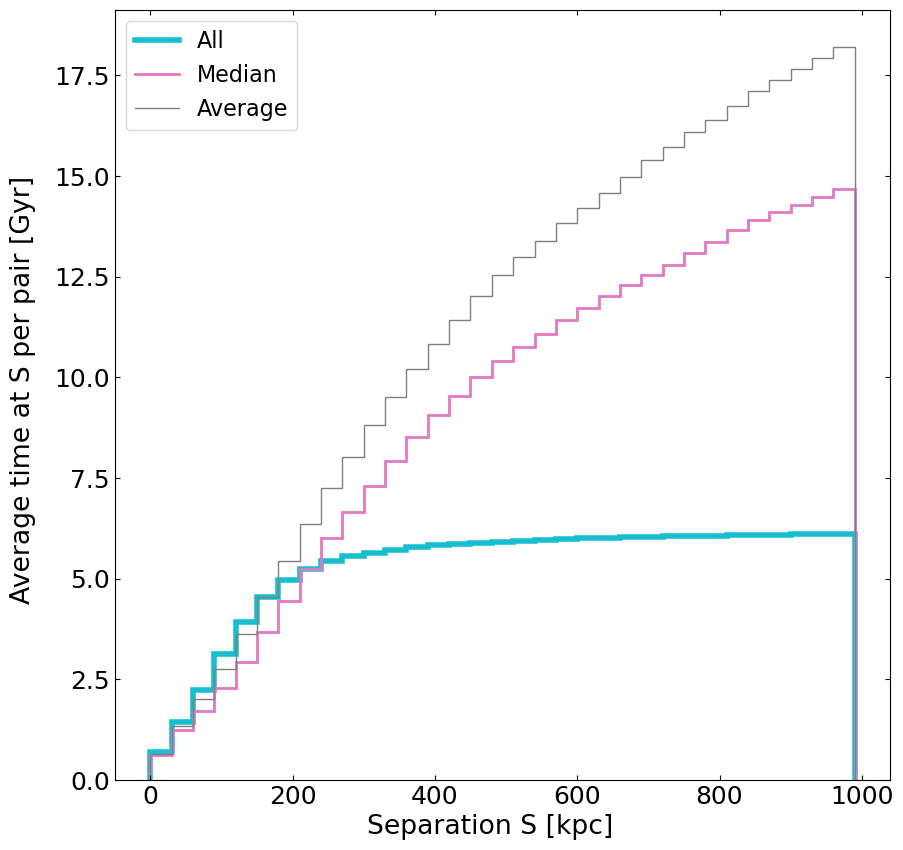

In [134]:
fig, ax = plt.subplots(1, 1, figsize=(10,10), sharey=True, sharex=True, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1],
                                    'wspace': 0.10,
                                    "hspace":0.04})
z={"33":"z=2","40":"z=1.5","50":"z=1"}


orb = orbit[40]
sep_matrix = orb["Separations"]
seps = orbit[40]['Separations']
elapsed_time = np.diff(snap_dict["Lookback Time"][1:][::-1])

# array of the elapsed time with a nan value in the place of z=0
elapsed_noz0 = np.concatenate((np.array([np.nan]),elapsed_time))
elapsed_matrix = np.tile(elapsed_noz0,(len(sep_matrix),1))

nan_elapsed = np.isnan(elapsed_matrix)
nan_sep = np.isnan(sep_matrix)
zero_sep = sep_matrix == 0
matrix_mask = ~nan_elapsed&~nan_sep&~zero_sep

merger_array = np.array(orb["MergerFlag"],dtype='bool')
merge_mask = np.tile(merger_array,(99,1)).transpose()

elapsed_masked = elapsed_matrix[matrix_mask]
sep_masked = sep_matrix[matrix_mask]

## calculate histograms
xx_merge = sep_matrix[matrix_mask&merge_mask]
xx_all = sep_matrix[matrix_mask]

yy_merge = elapsed_matrix[matrix_mask&merge_mask]
yy_all = elapsed_matrix[matrix_mask]


num_mergers = sum(merger_array)
num_pairs = len(merger_array)
bins = np.arange(0,1000,30)

#merged_vals, merged_edges = np.histogram(xx_merge,bins=bins,weights=yy_merge/num_mergers)
all_vals, all_edges = np.histogram(xx_all,bins=bins,weights=yy_all/num_pairs)

#ax.stairs(merged_vals,merged_edges,color="coral",lw=2,label="Merged")
ax.stairs(np.cumsum(all_vals),all_edges,color="tab:cyan",lw=4,label="All")

aves_nz = [] 
meds_nz = []

for binnum in range(len(bins)-1):
        lsep = bin_phys[binnum]
        usep = bin_phys[binnum+1]

        # all 
        sepmask = (lsep < seps) & (seps < usep) # does not include lower separation cut!! or group cut!! 

        elapsed_in_bin = np.where(sepmask,elapsed,0)
        total_per_halo = np.sum(elapsed_in_bin,axis=1)
#         average_non_zero = np.average(total_per_halo[np.nonzero(total_per_halo)])
        med_nonzero = np.median(total_per_halo[np.nonzero(total_per_halo)])
        ave_nonzero = np.mean(total_per_halo[np.nonzero(total_per_halo)])

#         means.append(average_non_zero)
        meds_nz.append(med_nonzero)
        aves_nz.append(ave_nonzero)
        
#     ax[znum][0].stairs(meds_phys, edges=bin_phys, lw=2, fill=True, alpha=0.15)

ax.stairs(np.cumsum(meds_nz),edges=bins,color="tab:pink",lw=2,label="Median")
ax.stairs(np.cumsum(aves_nz),edges=bins,color="tab:grey",lw=1,label="Average")

ax.legend()
# fig.suptitle("Timescales for major dwarf pairs",y=0.92)
fig.supxlabel("Separation S [kpc]",y=0.05)
fig.supylabel("Average time at S per pair [Gyr]")
# plt.savefig(f"{paths.path_plots}/4_timescales/timevssep_z.pdf")
plt.show()


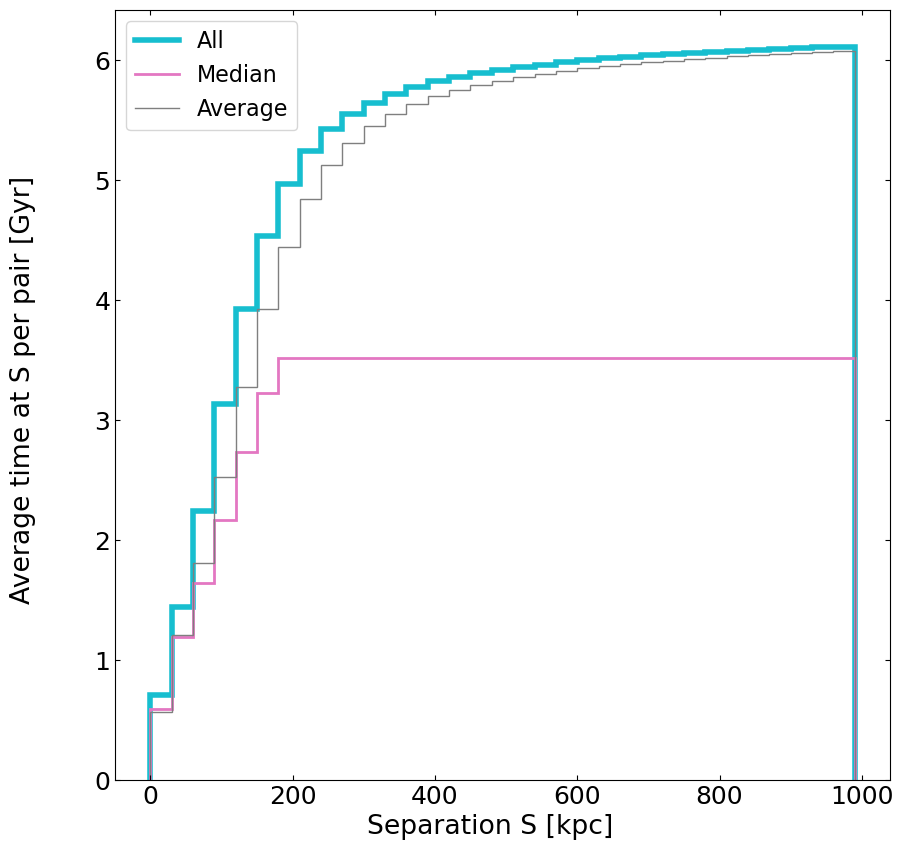

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(10,10), sharey=True, sharex=True, 
                       gridspec_kw={'width_ratios': [1], 
                                    'height_ratios':[1],
                                    'wspace': 0.10,
                                    "hspace":0.04})
z={"33":"z=2","40":"z=1.5","50":"z=1"}


orb = orbit[40]
sep_matrix = orb["Separations"]
seps = orbit[40]['Separations']
elapsed_time = np.diff(snap_dict["Lookback Time"][1:][::-1])

# array of the elapsed time with a nan value in the place of z=0
elapsed_noz0 = np.concatenate((np.array([np.nan]),elapsed_time))
elapsed_matrix = np.tile(elapsed_noz0,(len(sep_matrix),1))

nan_elapsed = np.isnan(elapsed_matrix)
nan_sep = np.isnan(sep_matrix)
zero_sep = sep_matrix == 0
matrix_mask = ~nan_elapsed&~nan_sep&~zero_sep

merger_array = np.array(orb["MergerFlag"],dtype='bool')
merge_mask = np.tile(merger_array,(99,1)).transpose()

elapsed_masked = elapsed_matrix[matrix_mask]
sep_masked = sep_matrix[matrix_mask]

## calculate histograms
xx_merge = sep_matrix[matrix_mask&merge_mask]
xx_all = sep_matrix[matrix_mask]

yy_merge = elapsed_matrix[matrix_mask&merge_mask]
yy_all = elapsed_matrix[matrix_mask]


num_mergers = sum(merger_array)
num_pairs = len(merger_array)
bins = np.arange(0,1000,30)

#merged_vals, merged_edges = np.histogram(xx_merge,bins=bins,weights=yy_merge/num_mergers)
all_vals, all_edges = np.histogram(xx_all,bins=bins,weights=yy_all/num_pairs)

#ax.stairs(merged_vals,merged_edges,color="coral",lw=2,label="Merged")
ax.stairs(np.cumsum(all_vals),all_edges,color="tab:cyan",lw=4,label="All")

aves_nz = [] 
meds_nz = []

for binnum in range(len(bins)-1):
        lsep = bin_phys[binnum]
        usep = bin_phys[binnum+1]

        # all 
        sepmask = (lsep < seps) & (seps < usep) # does not include lower separation cut!! or group cut!! 

        elapsed_in_bin = np.where(sepmask,elapsed,0)
        total_per_halo = np.sum(elapsed_in_bin,axis=1)
#         average_non_zero = np.average(total_per_halo[np.nonzero(total_per_halo)])
        med_nonzero = np.median(total_per_halo)
#         ave_nonzero = np.mean(total_per_halo[np.nonzero(total_per_halo)])
        ave_nonzero = np.mean(total_per_halo)

#         means.append(average_non_zero)
        meds_nz.append(med_nonzero)
        aves_nz.append(ave_nonzero)
        
#     ax[znum][0].stairs(meds_phys, edges=bin_phys, lw=2, fill=True, alpha=0.15)

ax.stairs(np.cumsum(meds_nz),edges=bins,color="tab:pink",lw=2,label="Median")
ax.stairs(np.cumsum(aves_nz),edges=bins,color="tab:grey",lw=1,label="Average")

ax.legend()
# fig.suptitle("Timescales for major dwarf pairs",y=0.92)
fig.supxlabel("Separation S [kpc]",y=0.05)
fig.supylabel("Average time at S per pair [Gyr]")
# plt.savefig(f"{paths.path_plots}/4_timescales/timevssep_z.pdf")
plt.show()
